# Basic Counter Program
### Last edited: Thu 3/27

## Description: Counts the frequency of composers and works, generating bar graphs of the top 10.

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from common import *

%matplotlib widget
#%matplotlib inline

In [2]:
# Unpickle dataframes
concerts = pd.read_pickle(DF_FILE_LOC + "concerts.pkl")
works = pd.read_pickle(DF_FILE_LOC + "works.pkl")

print(concerts)
print(works)

                                             id programID  \
0      00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1      3853   
1      1118e84e-eb59-46cc-9119-d903375e65e6-0.1      5178   
2      08536612-27c3-437e-9b44-def21034b06c-0.1     10785   
3      81a3b8de-1737-4c9e-9318-b839f7c7c4c0-0.1      5887   
4      09581bb7-8855-4965-b302-fc54cc669041-0.1       305   
...                                         ...       ...   
14800  d43a2456-e204-46fd-b0a6-011e59d09582-0.1     15140   
14801  8df25253-e1ff-494b-9d89-0972cad2209f-0.1     15142   
14802  5eec9db4-341b-4d42-a1ef-f310d21e9b98-0.1     15141   
14803  0b6a78dd-2001-461c-ad84-d8aa6fc963dc-0.1     14981   
14804  f871f538-c7bb-4d5c-902b-3dd4a53d5e68-0.1     14958   

                                      orchestra   season  \
0                         New York Philharmonic  1842-43   
1                         New York Philharmonic  1842-43   
2      Musicians from the New York Philharmonic  1842-43   
3                         N

In [3]:
# Clean works df
works = works.query('id != "0*"') # remove all entries that are intermissions

# Normalize title if it is a dictionary
def normalize_title(title):
    if isinstance(title, dict):
        return title.get("em", "") + " " + title.get("_", "")
    else:
        return title
works['n_title'] = works['title'].apply(normalize_title)

## Add Date column to concerts and works

# extract date from concert-info dictionary as new column
concerts['date'] = concerts['concerts'].apply(lambda x : x[0].get('Date', None))
# Convert extracted date to ISO8601, UTC datetime format
concerts['date'] = pd.to_datetime(concerts['date'], utc=True)
# Merge works with the datetime column
works = works.merge(concerts[['programID', 'date']], on='programID', how='left')
print(works)

# now groupby year... is that easy? right now it's in datetime format... maybe i just need date or even just year to be stored

           id programID                 composer  \
0      52446*      3853  Beethoven,  Ludwig  van   
1      8834*4      3853  Weber,  Carl  Maria von   
2       3642*      3853          Hummel,  Johann   
3      8834*3      3853  Weber,  Carl  Maria von   
4      8835*1      3853      Rossini,  Gioachino   
...       ...       ...                      ...   
75669  53648*     14981        Stravinsky,  Igor   
75670  50743*     14958  Weber,  Carl  Maria von   
75671  52492*     14958      Mendelssohn,  Felix   
75672  7345*4     14958      Mendelssohn,  Felix   
75673  53072*     14958        Schumann,  Robert   

                                                title  \
0                    SYMPHONY NO. 5 IN C MINOR, OP.67   
1                                              OBERON   
2                     QUINTET, PIANO, D MINOR, OP. 74   
3                                              OBERON   
4                                              ARMIDA   
...                              

In [4]:
# Count frequency of composers
composer_freq = works["composer"].value_counts()
print("In total:\n" + str(composer_freq))
print("----------------------------\n")

unique_composer_freq = works.groupby('composer')['programID'].nunique().reset_index()
unique_composer_freq.columns = ['composer', 'frequency']
unique_composer_freq = unique_composer_freq.sort_values(by = 'frequency', ascending=False)
print("Unique concerts:\n" + str(unique_composer_freq))
print("----------------------------\n")

# Count frequency of works
work_freq = works["title"].value_counts()
print("Work frequency:\n" + str(work_freq))
print("----------------------------\n")

unique_work_freq = works.groupby('n_title')['programID'].nunique().reset_index()
unique_work_freq.columns = ['title', 'frequency']
unique_work_freq = unique_work_freq.sort_values(by = 'frequency', ascending=False)
print("Unique works:\n" + str(unique_work_freq))


In total:
composer
Wagner,  Richard               4995
Beethoven,  Ludwig  van        4684
Tchaikovsky,  Pyotr  Ilyich    3811
Mozart,  Wolfgang  Amadeus     2800
Brahms,  Johannes              2646
                               ... 
Amirov,  Fikret                   1
Seter,                            1
Fry,  William  Henry              1
Fenton,                           1
Alom,  Ahmed                      1
Name: count, Length: 3131, dtype: int64
----------------------------

Unique concerts:
                         composer  frequency
199       Beethoven,  Ludwig  van       3549
2770  Tchaikovsky,  Pyotr  Ilyich       2601
2921             Wagner,  Richard       2333
1947   Mozart,  Wolfgang  Amadeus       2219
339             Brahms,  Johannes       2141
...                           ...        ...
1370          Johnson,  James  P.          1
1367              Johns,  Clayton          1
1366     Johansen,  David  Monrad          1
1362               Jimenez,  Noah          1
313

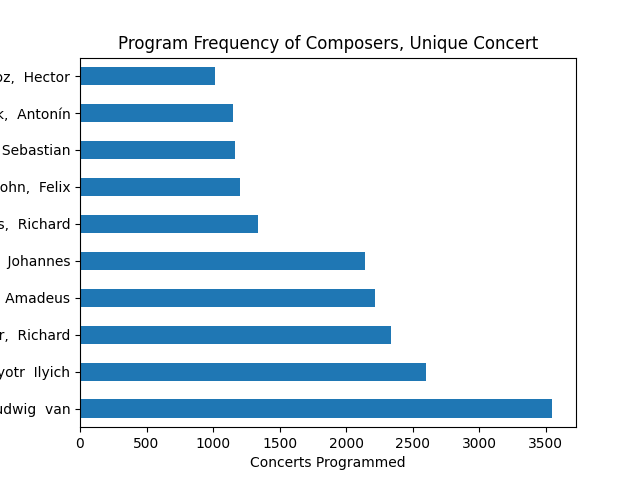

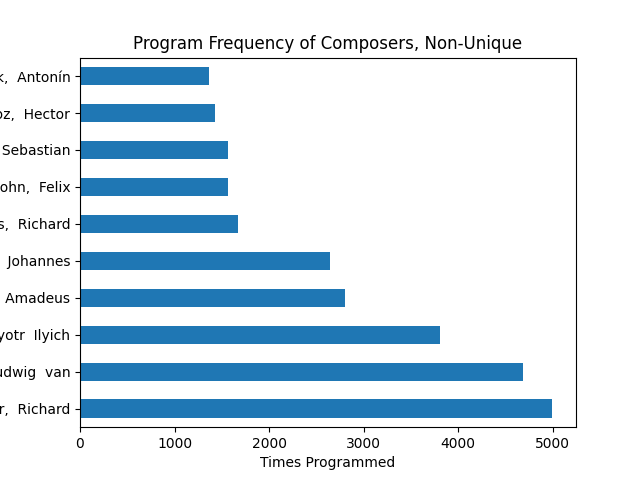

In [5]:
# Create bar graphs for composer frequency
top_10_composers = composer_freq.head(10)
top_10_composers.plot(kind='barh', xlabel='Times Programmed', ylabel='Composer', title='Program Frequency of Composers, Non-Unique')

top_10_unique_composers = unique_composer_freq.head(10)
top_10_unique_composers.plot(kind='barh', x='composer', y='frequency', xlabel='Concerts Programmed', ylabel='Composer', legend=False, title='Program Frequency of Composers, Unique Concert')
plt.show()
#plt.figure(figsize=(10,6))
#plt.bar(composer_freq.head(10)['composer'], composer_freq.head(10))

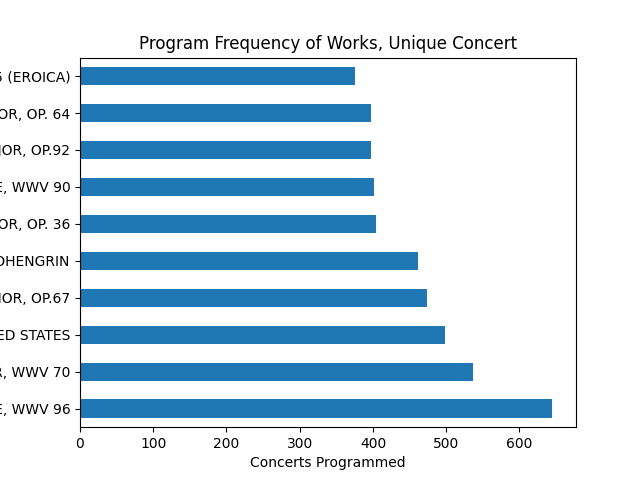

In [6]:
top_10_works = work_freq.head(10)
top_10_works.plot(kind='barh', xlabel='Times Programmed', ylabel='Works', title='Program Frequency of Works')

top_10_unique_works = unique_work_freq.head(10)
top_10_unique_works.plot(kind='barh', x='title', y='frequency', xlabel='Concerts Programmed', ylabel='Title', legend=False, title='Program Frequency of Works, Unique Concert')
plt.show()

In [7]:
# Print overall statistics
print("Total # of concerts: " + str(len(concerts)))
print("Total # of works: " + str(len(works)))
print("Avg # of works per concert: " + str((len(works) / len(concerts))))

Total # of concerts: 14805
Total # of works: 75674
Avg # of works per concert: 5.111381290104695


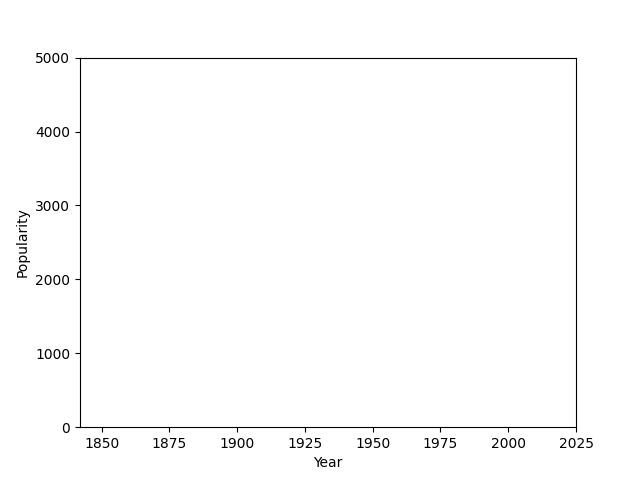

In [ ]:
# Animated Line Graph of Composer Frequency over Time

# TWO OPTIONS:
# - Generate composer frequency per season/year... lots of storage but
#   fast updates to graph
# - Each update in the graph, recalculate composer frequencies
#   this may be better because operations are optimized for Dataframes
#   - Further optimization, store date with each work, so less conversion
#   time to datetime object every single time


# TODO:
# Switch to bar graph? Adjust for the fact that we are just displaying
# top_N lines, not all composers... so hard to graph all of them but
# the disjointness is bad as composers enter/exit the top_N.

# Setup and Modifiable Variables
comp_freq = pd.Series(np.zeros(len(composer_freq)), index=composer_freq.index) # create composer frequency from zero
curr_year = 1842 # start date of animation, first date of concerts
year_range = 5 # modify to adjust for specificity of animation
top_N = 10 # modify to adjust number of composers displayed

# Plot setup
# start with time vs. popularity line graph
fig, ax = plt.subplots()
lines = [ax.plot([], [])[0] for i in range(top_N)]
ax.set(xlim=[1842, 2025], ylim=[0, 5000], xlabel='Year', ylabel='Popularity')
composer_trends = {composer: ([], []) for composer in composer_freq.index}

# Group works by their year
works_by_year = works.groupby(works.date.dt.year)

# Function to upate comp_freq with data from specific year_range
def update_freq(composer):
    if composer in comp_freq:
        comp_freq[composer] += 1

# Function to update each frame of the animation
def update_LINE(frame):
    global comp_freq, curr_year, year_range, top_N, works_by_year
    # curr_year, curr_year + year_range)
    for year in range(curr_year, curr_year + year_range):
        # Loop through all works in this year and update composer
        if year in works_by_year.groups:
            works_by_year.get_group(year)['composer'].apply(update_freq)

    # Update year for next frame
    curr_year += year_range
    
    # Update line plots... may be disjoint lol BUT not an issue with bar graphs... or lowkey it might still bel ol.
    top = comp_freq.nlargest(top_N)
    i = 0
    for composer, freq in top.items():
        years, freqs = composer_trends[composer]
        years.append(curr_year)
        freqs.append(freq)

        lines[i].set_xdata(years)
        lines[i].set_ydata(freqs)
        lines[i].set_label(composer)
        i += 1
    
    ax.legend(loc='upper left')

    return lines

ani = animation.FuncAnimation(fig=fig, func=update_LINE, frames=(2025 - 1842) // year_range, interval=1000, blit=False)
plt.show()

In [ ]:
# Animated Bar Graph of Composer Frequency over Time

# Setup and Modifiable Variables
#comp_freq = pd.Series(np.zeros(len(composer_freq)), index=composer_freq.index) # create composer frequency from zero
comp_freq = pd.Series(dtype=int)
curr_year = 1842 # start date of animation, first date of concerts
year_range = 5 # modify to adjust for specificity of animation
top_N = 10 # modify to adjust number of composers displayed

# Plot setup
fig, ax = plt.subplots()
bars = ax.barh([], [])
ax.set(xlim=[0, 5000], xlabel='Popularity', ylabel='Composer', title='Composer Popularity Over Time')
ax.invert_yaxis()

# Group works by their year
works_by_year = works.groupby(works.date.dt.year)['composer']

# Function to upate comp_freq with data from specific year_range
def update_freq(composer):
    if composer in comp_freq:
        comp_freq[composer] += 1

# Function to update each frame of the animation
def update(frame):
    global comp_freq, curr_year, year_range, top_N, works_by_year

    # Stop animation if we reach or exceed 2025
    if curr_year >= 2025:
        print("Animation complete.")
        plt.close(fig)  # Close the plot window
        return

    # curr_year, curr_year + year_range)
    for year in range(curr_year, min(curr_year + year_range, 2025)):
        # Loop through all works in this year and update composer
        if year in works_by_year.groups:
            works_by_year.get_group(year)['composer'].apply(update_freq)
    

    # Update bar data
    top = comp_freq.nlargest(top_N)
    # Debugging: Print to verify it's updating correctly
    print(f"Year: {curr_year}, Top Composers: {top.to_dict()}")

    ax.clear()
    ax.set_xlim([0, 5000])
    ax.set_xlabel("Popularity")
    ax.set_ylabel("Composer")
    ax.set_title(f"Composer Popularity Over Time ({curr_year}-{min(curr_year + year_range, 2025)})")
    ax.invert_yaxis()  # Highest bars at the top
    bars = ax.barh(list(top.index), list(top.values), color="skyblue")
    ax.legend(loc='upper left')

    # Update year for next frame
    curr_year += year_range

    return bars

num_frames = (2025 - 1842) // year_range
ani = animation.FuncAnimation(fig=fig, func=update, frames=num_frames, interval=2000, blit=True)
plt.show()